# Complexity experiment

In [87]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import pylab
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import lilliefors

In [139]:
df = pd.read_csv("data.csv")
print(df.dtypes)
df.head()

#                     int64
Maq                   int64
Algoritmo            object
N                     int64
t (pico)             object
t sin norm(pico)    float64
dtype: object


,#,Maq,Algoritmo,N,t (pico),t sin norm(pico)
0,1,1,MergeSort,4096,7.299.072.266,2.989700e+09
1,2,1,SelectionSort,4096,4.066.625.977,1.665690e+10
2,3,1,MergeSort,8192,4.835.693.359,3.961400e+09
3,4,1,SelectionSort,8192,7.954.199.219,6.516080e+10
4,5,1,MergeSort,16384,4.742.614.746,7.770300e+09


In [140]:
sdf = df[df["Algoritmo"] == "SelectionSort"]
mdf = df[df["Algoritmo"] == "MergeSort"]

# Normality test

In [161]:
response_var = "t sin norm(pico)"

def generate_nomarlity_plots(df, algorithm):

    nrows = len(df["Maq"].unique())
    ncols = len(df["N"].unique())

    fig, axs = plt.subplots(nrows=nrows,ncols=ncols, 
                            figsize=(6*ncols,4*nrows), 
                            sharex=True)

    for i, maq in enumerate(df["Maq"].unique()):
        for j,n in enumerate(df["N"].unique()):
            ax = axs[i,j]

            data = df[(df["Maq"] == maq) & (df["N"] == n)][response_var]
            data = data[data.between(data.quantile(.15), data.quantile(.85))].values # without outliers
            data = data.flatten()

            stats.probplot(data, dist="norm", plot=ax)
            statistic, pvalue = lilliefors(data) 
            is_normal = "Normal" if pvalue > 0.5 else "Not normal", 
            title = "P-value: {:.3f}, {}. N={}".format(pvalue, is_normal[0],len(data))
            ax.title.set_text(title)

    # set labels
    for i,n in enumerate(sdf["N"].unique()):
        plt.setp(axs[-1, i], xlabel=f"N={n}")

    for i,maq in enumerate(sdf["Maq"].unique()):
        plt.setp(axs[i, 0], ylabel= f"Maq: {maq}")
    
    fig.suptitle(algorithm)
    return fig

## Selection sort

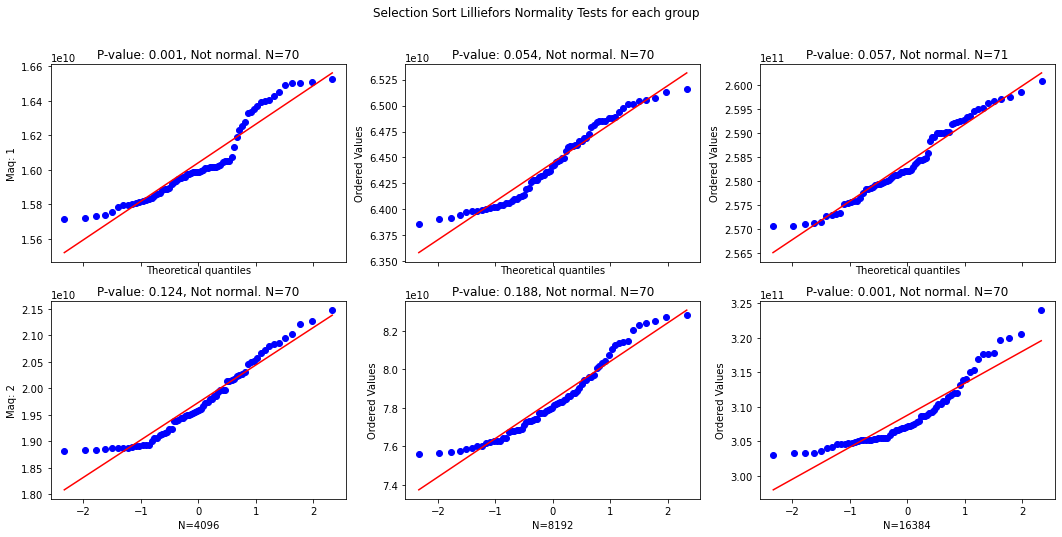

In [166]:
fig = generate_nomarlity_plots(sdf, algorithm="Selection Sort Lilliefors Normality Tests for each group")
plt.savefig("./imgs/selection_sort_normality_tests.jpg")

## Merge sort

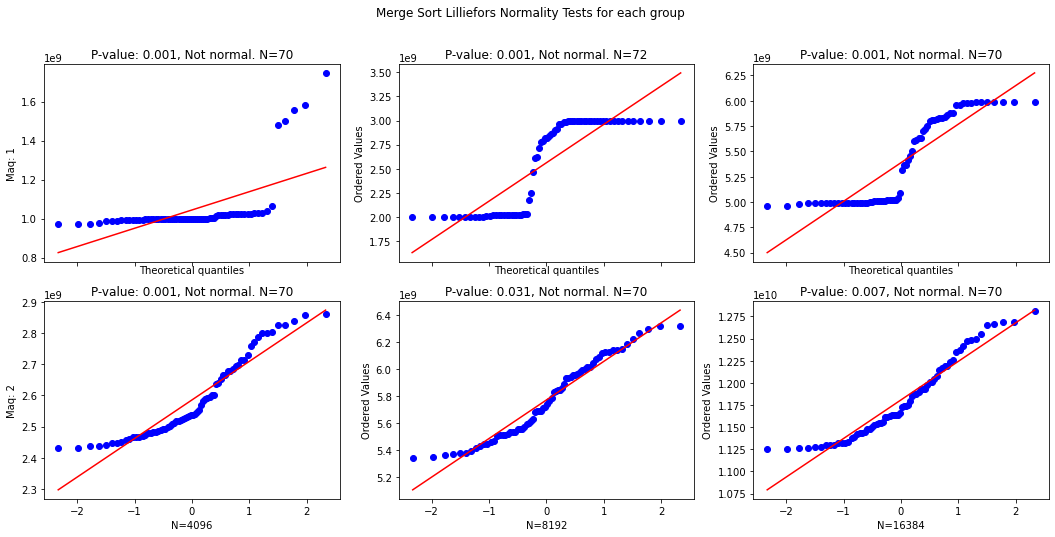

In [167]:
fig = generate_nomarlity_plots(mdf, algorithm="Merge Sort Lilliefors Normality Tests for each group")
plt.savefig("./imgs/merge_sort_normality_tests.jpg")